In [1]:
import pandas  as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf 
from tensorflow import keras

In [2]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.shape

(303, 14)

In [6]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: >

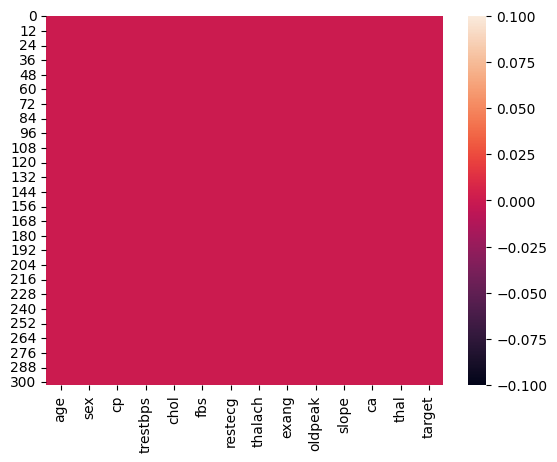

In [7]:
sns.heatmap(df.isna())

In [8]:
X=df.drop('target',axis=1)
y=df['target']

In [9]:
np.random.seed(1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)
print(X_train.shape,X_test.shape,y_test.shape,y_train.shape)

(242, 13) (61, 13) (61,) (242,)


In [10]:
Model=keras.Sequential([
    keras.layers.Flatten(input_shape=(13,)),
    keras.layers.Dense(7,activation='relu'), 
    keras.layers.Dense(1,activation='sigmoid')
])

Model.compile(
    metrics=['accuracy'], 
    loss='binary_crossentropy', 
    optimizer='adam'
)

Model.fit(X_train,y_train,epochs=1000)

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4558 - loss: 56.9584
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4570 - loss: 53.1961 
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4084 - loss: 54.3543 
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4468 - loss: 47.1759 
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4306 - loss: 45.3636 
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4613 - loss: 39.1965 
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4570 - loss: 35.8675 
Epoch 8/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4793 - loss: 31.1016 
Epoch 9/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4403 - loss: 31.5356 
Epoch 10/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4310 - loss: 27.8011 
Epoch 11/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4312 - loss: 25.8320 
Epoch 12/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

In [11]:
Model.evaluate(X_train,y_train)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8555 - loss: 0.3567  


[0.34966638684272766, 0.8677685856819153]

In [12]:
Model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.8386 - loss: 0.4105  


[0.40693145990371704, 0.8360655903816223]

# Model is over fitted , we will me make a drop out layer in it

In [13]:
Model=keras.Sequential([
    keras.layers.Flatten(input_shape=(13,)),
    keras.layers.Dense(7,activation='relu'), 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3,activation='relu'), 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation='sigmoid')
])

Model.compile(
    metrics=['accuracy'], 
    loss='binary_crossentropy', 
    optimizer='adam'
)

Model.fit(X_train,y_train,epochs=1000)

Epoch 1/1000


C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4326 - loss: 24.4397
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5271 - loss: 15.8158 
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4292 - loss: 12.1094 
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4798 - loss: 10.8124
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4984 - loss: 11.8046 
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.4828 - loss: 12.0504 
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5204 - loss: 8.7946 
Epoch 8/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.4479 - loss: 7.3791   
Epoch 9/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.4991 - loss: 4.1281  
Epoch 10/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4514 - loss: 6.1242 
Epoch 11/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4946 - loss: 5.1213 
Epoch 12/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4767 - 

In [14]:
Model.evaluate(X_train,y_train)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5826 - loss: 0.6826  


[0.6890227198600769, 0.5454545617103577]

In [15]:
Model.evaluate(X_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.5377 - loss: 0.6903  


[0.689791202545166, 0.5409836173057556]

In [16]:
y_pred=Model.predict(X_test)
y_pred[:6]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


array([[0.5428647],
       [0.5428647],
       [0.5428647],
       [0.5428647],
       [0.5428647],
       [0.5428647]], dtype=float32)

In [17]:
y_predicted=[]
for i in y_pred:
    if i<=0.5:
        y_predicted.append(0)
    else:
       y_predicted.append(1)
y_predicted[:5]

[1, 1, 1, 1, 1]

In [18]:
mode=DecisionTreeClassifier().fit(X_train,y_train)
(mode.score(X_train,y_train),mode.score(X_test,y_test))

(1.0, 0.7213114754098361)

In [19]:
model4=RandomForestClassifier().fit(X_train,y_train)
(model4.score(X_train,y_train),model4.score(X_test,y_test))

(1.0, 0.8032786885245902)

In [20]:
model=LogisticRegression().fit(X_train,y_train)
(model.score(X_train,y_train),model.score(X_test,y_test))

C:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.859504132231405, 0.8360655737704918)

In [21]:
y_pred=model.predict(X_test)
y_pred[:6]

array([1, 1, 1, 1, 1, 1], dtype=int64)

In [22]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        26
           1       0.88      0.83      0.85        35

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61



In [23]:
cm=confusion_matrix(y_pred,y_test)

<Axes: >

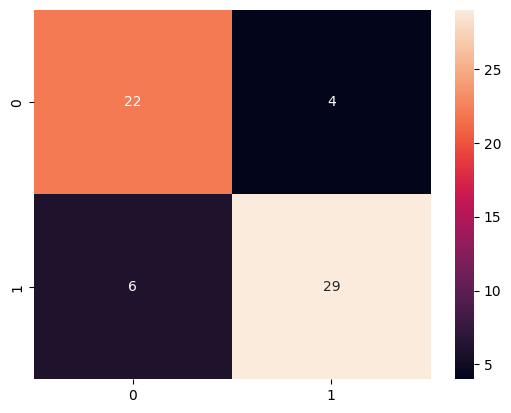

In [24]:
sns.heatmap(cm,annot=True)

In [25]:
import pickle
file = open('Heart_prediction.pkl', 'wb')
pickle.dump(model,file)

In [31]:
with open('C:/Users/user/OneDrive/Desktop/Git_hub_projects/Multiple_Diseases_Prediction/Model_pickles/Heart_prediction.pkl', 'wb') as f:
    pickle.dump(model, f)